#### Pima Indian - 회귀
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7270283/  참조

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)
import warnings
warnings.filterwarnings('ignore')

- 데이터 전처리

In [4]:
df = pd.read_csv('data/pima-indians-diabetes.csv', skiprows=9, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df[8].values, stratify=df[8].values, test_size=0.2, random_state=seed
)

- 모델 정의/설정/학습/평가
- Case 1 ) Hidden layer : 5 ea

In [11]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
model = Sequential([
    Dense(100, input_dim=8, activation='relu'),
    Dense(78, activation='relu'),
    Dropout(0.25),
    Dense(44, activation='relu'),
    Dropout(0.25),
    Dense(22, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               900       
                                                                 
 dense_7 (Dense)             (None, 78)                7878      
                                                                 
 dropout_2 (Dropout)         (None, 78)                0         
                                                                 
 dense_8 (Dense)             (None, 44)                3476      
                                                                 
 dropout_3 (Dropout)         (None, 44)                0         
                                                                 
 dense_9 (Dense)             (None, 22)                990       
                                                                 
 dense_10 (Dense)            (None, 8)                

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
mc = ModelCheckpoint('models/best_pima_indian_diabetes.h5', monitor='val_loss',
                     verbose=0, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=20)

In [16]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=300, batch_size=100, verbose=0,
                 callbacks=[mc, es])

In [17]:
best_model = load_model('models/best_pima_indian_diabetes.h5')
best_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8052


[0.4570198953151703, 0.8051947951316833]

- 시각화

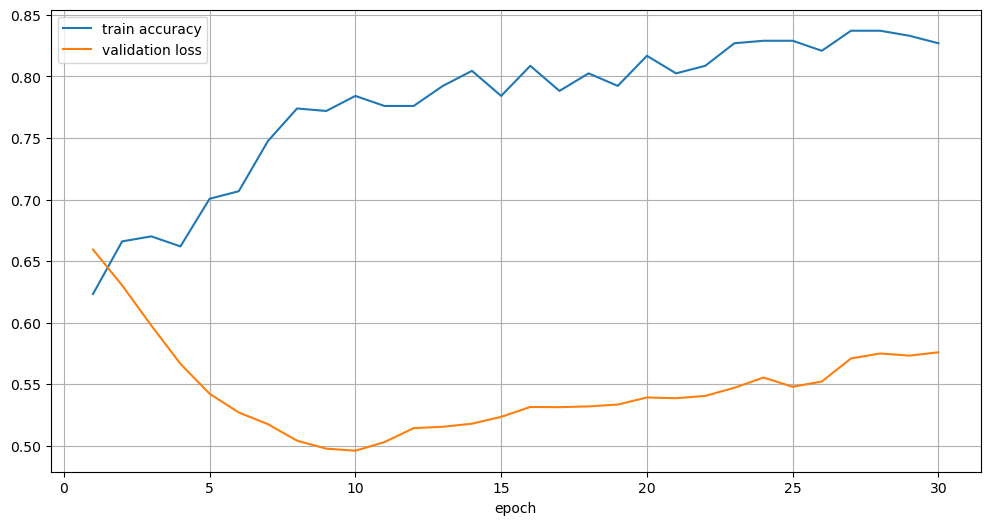

In [20]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

- Case 2) hidden layer : 4, epochs : 500, w/o Dropout

In [21]:
model2 = Sequential([
    Dense(34, input_dim=8, activation='relu'),
    Dense(18, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 34)                306       
                                                                 
 dense_13 (Dense)            (None, 18)                630       
                                                                 
 dense_14 (Dense)            (None, 8)                 152       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1097 (4.29 KB)
Trainable params: 1097 (4.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
mc = ModelCheckpoint('models/best_pima_indian_diabetes2.h5', verbose=0, save_best_only=True)
es = EarlyStopping(patience=10)

In [24]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=500, batch_size=100, verbose=0,
                   callbacks=[mc, es])

In [25]:
best_model2 = load_model('models/best_pima_indian_diabetes2.h5')
best_model2.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.7727


[0.45524072647094727, 0.7727272510528564]

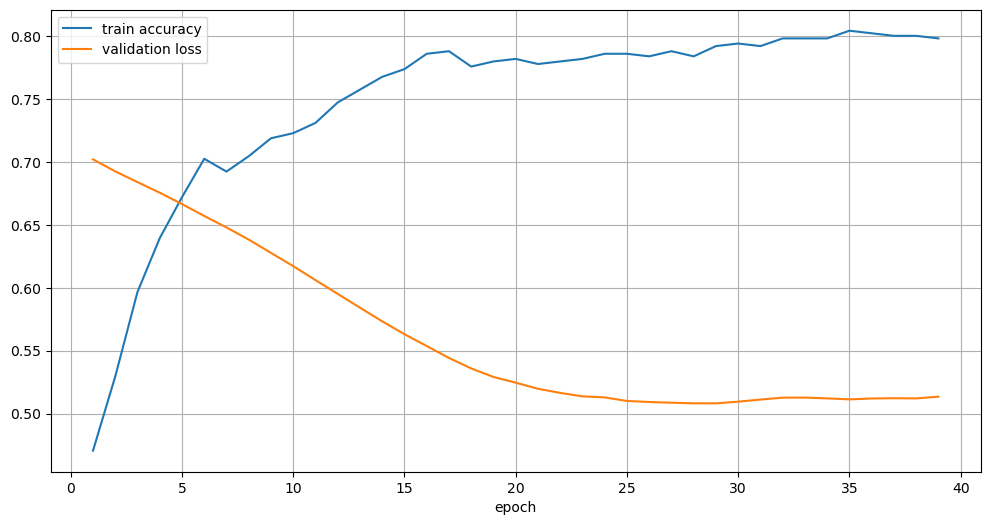

In [26]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)
plt.figure(figsize=(12,6))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

- Case 3) hidden layer : 3, epoch : 5000, with dropout

In [27]:
model3 = Sequential([
    Dense(54, input_dim=8, activation='relu'),
    Dropout(0.5),
    Dense(28, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [28]:
model3.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
mc = ModelCheckpoint('models/best_pima_indian_diabetes3.h5', monitor='val_loss', verbose=0, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=5)

In [29]:
hist3 = model3.fit(X_train, y_train, validation_split=0.2,
                   epochs=5000, batch_size=100, verbose=0,
                   callbacks=[mc, es])

In [30]:
best_model3 = load_model('models/best_pima_indian_diabetes3.h5')
best_model3.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7857


[0.4612959325313568, 0.7857142686843872]

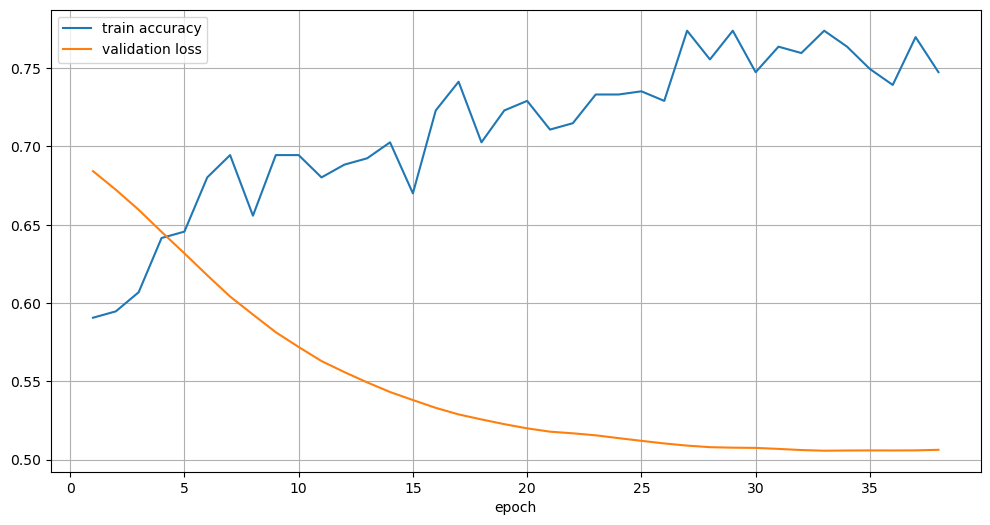

In [31]:
y_acc3 = hist3.history['accuracy']
y_vloss3 = hist3.history['val_loss']
xs3 = np.arange(1, len(y_acc3)+1)

plt.figure(figsize=(12,6))
plt.plot(xs3, y_acc3, label='train accuracy')
plt.plot(xs3, y_vloss3, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

- Case 4) Epoch : 50, hidden layer : 6

In [32]:
model4 = Sequential([
    Dense(128, input_dim=8, activation='relu'),
    Dense(86, activation='relu'),
    Dropout(0.25),
    Dense(68, activation='relu'),
    Dropout(0.25),
    Dense(42, activation='relu'),
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
model4.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
mc4 = ModelCheckpoint('models/best_pima_indian_diabetes4.h5', verbose=0, save_best_only=True)
es4 = EarlyStopping(patience=5)

In [35]:
hist4 = model4.fit(X_train, y_train, validation_split=0.2,
                   epochs=50, batch_size=100, verbose=0,
                   callbacks=[mc4, es4])

In [36]:
best_model4 = load_model('models/best_pima_indian_diabetes4.h5')
best_model4.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7662


[0.45212286710739136, 0.7662337422370911]

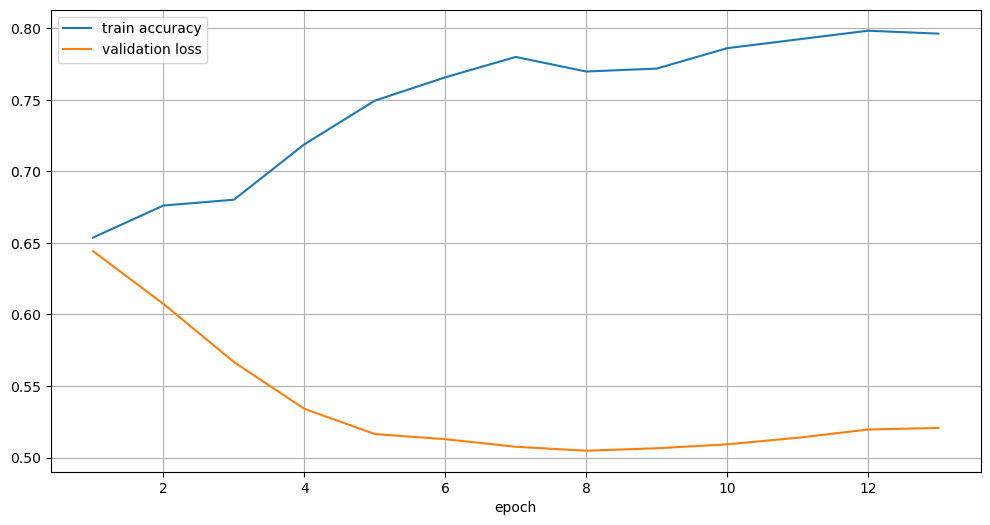

In [37]:
y_acc4 = hist4.history['accuracy']
y_vloss4 = hist4.history['val_loss']
xs4 = np.arange(1, len(y_acc4)+1)

plt.figure(figsize=(12,6))
plt.plot(xs4, y_acc4, label='train accuracy')
plt.plot(xs4, y_vloss4, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

- Case 5) Hidden Layer : 2ea, Epoch 15

In [38]:
model5 = Sequential([
    Dense(36, input_dim=8, activation='relu'),
    Dense(18, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [39]:
model5.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
mc5 = ModelCheckpoint('models/best_pima_indian_diabetes5.h5', verbos=0, save_best_only=True)
es5 = EarlyStopping(patience=5)

In [40]:
hist5 = model5.fit(X_train, y_train, validation_split=0.2,
                   epochs=15, batch_size=100, verbose=0,
                   callbacks=[mc5, es5])

In [41]:
best_model5 = load_model('models/best_pima_indian_diabetes5.h5')
best_model5.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7532


[0.4971683621406555, 0.7532467246055603]

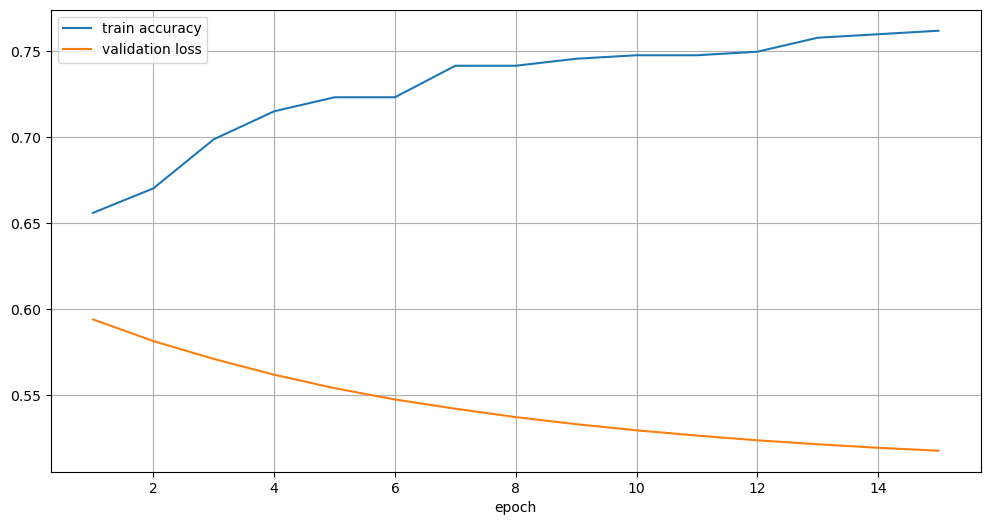

In [42]:
y_acc5 = hist5.history['accuracy']
y_vloss5 = hist5.history['val_loss']
xs5 = np.arange(1, len(y_acc5)+1)

plt.figure(figsize=(12,6))
plt.plot(xs5, y_acc5, label='train accuracy')
plt.plot(xs5, y_vloss5, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

In [46]:
rf = pd.DataFrame({
    'HL' : [5, 4, 3, 6, 2],
    'Accuracy' : [0.8052, 0.7727, 0.7857, 0.7662, 0.7532],
    'Epoch' : [300, 500, 5000, 50, 15]
}, index=['Case1', 'Case2', 'Case3', 'Case4', 'Case5'])
rf

,HL,Accuracy,Epoch
Case1,5,0.8052,300
Case2,4,0.7727,500
Case3,3,0.7857,5000
Case4,6,0.7662,50
Case5,2,0.7532,15
